In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
centrales = requests.get('https://api-infotecnica.coordinador.cl/v1/centrales-sin-filtrar/extended/?format=json')
data = centrales.json()
df_sen = pd.DataFrame(data)
df_sen = df_sen[['id','nombre','tipo_central_nombre','region_nombre','latitud','longitud','potencia_maxima']]
df_sen.rename(columns={'id':'id_infotecnica'}, inplace=True)
df_sen

,id_infotecnica,nombre,tipo_central_nombre,region_nombre,latitud,longitud,potencia_maxima
0,110,TER CENIZAS,Termoeléctricas,Atacama,-27.484321,-70.391944,15.2545
1,145,PE MONTE REDONDO,Eólicas,Coquimbo,-31.077327,-71.657829,48.0000
2,221,PMGD HP MUCHI,Hidroeléctricas,Los Ríos,-40.316774,-72.227259,1.0000
3,236,TER CAMPICHE,Termoeléctricas,Valparaíso,-32.748294,-71.483299,269.6600
4,260,TER BOCAMINA II [No_Mostrar],Termoeléctricas,Biobío,-37.021485,-73.167313,349.5500
...,...,...,...,...,...,...,...
1273,215,CENTRAL ELIMINADA,Hidroeléctricas,NaN,NaN,NaN,NaN
1274,34,PMGD TER SKRETTING,Termoeléctricas,Los Lagos,-40.587516,-73.098895,2.7000
1275,416,LA MONTAÑA,Termoeléctricas,Metropolitana,NaN,NaN,2.9500
1276,469,LA HUAYCA SPS-1 [No_Mostrar],Solares,Tarapacá,NaN,NaN,1.3500


In [3]:
df = pd.read_csv(r'../data/meteo_sen.csv')

df

,temp,precip,vel_viento,dir_viento,rad_glob,rad_dir,rad_dif,pres_sup,nub,date_utc,date_local,id_infotecnica,created_at
0,20.0,0.0,5.2,265.4,0.0,0.0,0.0,755,0,2016-01-01 00:00:00.000,2015-12-31 20:00:00.000,1696,2023-08-04 12:36:18.066
1,18.2,0.0,4.0,261.3,0.0,0.0,0.0,755,2,2016-01-01 01:00:00.000,2015-12-31 21:00:00.000,1696,2023-08-04 12:36:18.066
2,16.4,0.0,2.9,253.7,0.0,0.0,0.0,756,3,2016-01-01 02:00:00.000,2015-12-31 22:00:00.000,1696,2023-08-04 12:36:18.066
3,14.6,0.0,1.8,237.0,0.0,0.0,0.0,756,5,2016-01-01 03:00:00.000,2015-12-31 23:00:00.000,1696,2023-08-04 12:36:18.066
4,13.4,0.0,1.9,219.4,0.0,0.0,0.0,756,6,2016-01-01 04:00:00.000,2016-01-01 00:00:00.000,1696,2023-08-04 12:36:18.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35049841,8.6,0.0,1.7,130.2,408.8,328.9,79.9,981,0,2024-05-03 14:00:00.000,2024-05-03 10:00:00.000,2009,2024-05-03 18:26:18.934
35049842,11.2,0.0,1.3,98.5,537.7,449.4,88.3,982,1,2024-05-03 15:00:00.000,2024-05-03 11:00:00.000,2009,2024-05-03 18:26:18.934
35049843,11.6,0.0,1.7,285.1,609.5,512.2,97.4,982,3,2024-05-03 16:00:00.000,2024-05-03 12:00:00.000,2009,2024-05-03 18:26:18.934
35049844,12.6,0.0,2.1,295.7,617.4,512.3,105.1,982,3,2024-05-03 17:00:00.000,2024-05-03 13:00:00.000,2009,2024-05-03 18:26:18.934


In [4]:
df_erv = df[['date_utc','date_local','id_infotecnica','rad_glob','vel_viento']]

df_erv

,date_utc,date_local,id_infotecnica,rad_glob,vel_viento
0,2016-01-01 00:00:00.000,2015-12-31 20:00:00.000,1696,0.0,5.2
1,2016-01-01 01:00:00.000,2015-12-31 21:00:00.000,1696,0.0,4.0
2,2016-01-01 02:00:00.000,2015-12-31 22:00:00.000,1696,0.0,2.9
3,2016-01-01 03:00:00.000,2015-12-31 23:00:00.000,1696,0.0,1.8
4,2016-01-01 04:00:00.000,2016-01-01 00:00:00.000,1696,0.0,1.9
...,...,...,...,...,...
35049841,2024-05-03 14:00:00.000,2024-05-03 10:00:00.000,2009,408.8,1.7
35049842,2024-05-03 15:00:00.000,2024-05-03 11:00:00.000,2009,537.7,1.3
35049843,2024-05-03 16:00:00.000,2024-05-03 12:00:00.000,2009,609.5,1.7
35049844,2024-05-03 17:00:00.000,2024-05-03 13:00:00.000,2009,617.4,2.1


In [5]:
## Seteamos el factor de potencia de eolicas

# Define the conditions for each range
conditions = [
    (df['vel_viento'] < 3),                  # 0 to 3 m/s
    (df['vel_viento'] >= 3) & (df['vel_viento'] < 15),  # 3 to 15 m/s
    (df['vel_viento'] >= 15) & (df['vel_viento'] <= 25),  # 15 to 25 m/s
    (df['vel_viento'] > 25)                  # above 25 m/s
]

# Define the corresponding values for each range
values = [
    0,  # vel_viento < 3
    1 / (1 + np.exp(-1.3 * (df['vel_viento'] - 7))),  # 3 <= vel_viento < 15
    1,  # 15 <= vel_viento <= 25
    0   # vel_viento > 25
]

# Apply the piecewise function to create the new column
df_erv['power_factor_eo'] = np.select(conditions, values)

df_erv

C:\Users\gigle\AppData\Local\Temp\ipykernel_28244\2616540901.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erv['power_factor_eo'] = np.select(conditions, values)


,date_utc,date_local,id_infotecnica,rad_glob,vel_viento,power_factor_eo
0,2016-01-01 00:00:00.000,2015-12-31 20:00:00.000,1696,0.0,5.2,0.087864
1,2016-01-01 01:00:00.000,2015-12-31 21:00:00.000,1696,0.0,4.0,0.019840
2,2016-01-01 02:00:00.000,2015-12-31 22:00:00.000,1696,0.0,2.9,0.000000
3,2016-01-01 03:00:00.000,2015-12-31 23:00:00.000,1696,0.0,1.8,0.000000
4,2016-01-01 04:00:00.000,2016-01-01 00:00:00.000,1696,0.0,1.9,0.000000
...,...,...,...,...,...,...
35049841,2024-05-03 14:00:00.000,2024-05-03 10:00:00.000,2009,408.8,1.7,0.000000
35049842,2024-05-03 15:00:00.000,2024-05-03 11:00:00.000,2009,537.7,1.3,0.000000
35049843,2024-05-03 16:00:00.000,2024-05-03 12:00:00.000,2009,609.5,1.7,0.000000
35049844,2024-05-03 17:00:00.000,2024-05-03 13:00:00.000,2009,617.4,2.1,0.000000


In [6]:
## Seteamos el factor de potencia de solares

# Define the conditions for each range
conditions = [
    (df['vel_viento'] < 3),                  # 0 to 3 m/s
    (df['vel_viento'] >= 3) & (df['vel_viento'] < 15),  # 3 to 15 m/s
    (df['vel_viento'] >= 15) & (df['vel_viento'] <= 25),  # 15 to 25 m/s
    (df['vel_viento'] > 25)                  # above 25 m/s
]

# Define the corresponding values for each range
values = [
    0,  # vel_viento < 3
    1 / (1 + np.exp(-1.3 * (df['vel_viento'] - 7))),  # 3 <= vel_viento < 15
    1,  # 15 <= vel_viento <= 25
    0   # vel_viento > 25
]

# Apply the piecewise function to create the new column
df_erv['power_factor_so'] = np.select(conditions, values)

df_erv

C:\Users\gigle\AppData\Local\Temp\ipykernel_28244\2070135171.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erv['power_factor_so'] = np.select(conditions, values)


,date_utc,date_local,id_infotecnica,rad_glob,vel_viento,power_factor_eo,power_factor_so
0,2016-01-01 00:00:00.000,2015-12-31 20:00:00.000,1696,0.0,5.2,0.087864,0.087864
1,2016-01-01 01:00:00.000,2015-12-31 21:00:00.000,1696,0.0,4.0,0.019840,0.019840
2,2016-01-01 02:00:00.000,2015-12-31 22:00:00.000,1696,0.0,2.9,0.000000,0.000000
3,2016-01-01 03:00:00.000,2015-12-31 23:00:00.000,1696,0.0,1.8,0.000000,0.000000
4,2016-01-01 04:00:00.000,2016-01-01 00:00:00.000,1696,0.0,1.9,0.000000,0.000000
...,...,...,...,...,...,...,...
35049841,2024-05-03 14:00:00.000,2024-05-03 10:00:00.000,2009,408.8,1.7,0.000000,0.000000
35049842,2024-05-03 15:00:00.000,2024-05-03 11:00:00.000,2009,537.7,1.3,0.000000,0.000000
35049843,2024-05-03 16:00:00.000,2024-05-03 12:00:00.000,2009,609.5,1.7,0.000000,0.000000
35049844,2024-05-03 17:00:00.000,2024-05-03 13:00:00.000,2009,617.4,2.1,0.000000,0.000000


In [7]:
df_erv_ = pd.merge(df_erv, df_sen[['id_infotecnica','tipo_central_nombre','region_nombre','potencia_maxima','latitud','longitud']], how='left', on='id_infotecnica')
df_erv_['date_local'] = pd.to_datetime(df_erv_['date_local'], format='%Y-%m-%d %H:%M:%S.%f')
df_erv_['date_utc'] = pd.to_datetime(df_erv_['date_utc'], format='%Y-%m-%d %H:%M:%S.%f')

df_erv_

,date_utc,date_local,id_infotecnica,rad_glob,vel_viento,power_factor_eo,power_factor_so,tipo_central_nombre,region_nombre,potencia_maxima,latitud,longitud
0,2016-01-01 00:00:00,2015-12-31 20:00:00,1696,0.0,5.2,0.087864,0.087864,Solares,Antofagasta,58.9900,-22.480008,-68.804878
1,2016-01-01 01:00:00,2015-12-31 21:00:00,1696,0.0,4.0,0.019840,0.019840,Solares,Antofagasta,58.9900,-22.480008,-68.804878
2,2016-01-01 02:00:00,2015-12-31 22:00:00,1696,0.0,2.9,0.000000,0.000000,Solares,Antofagasta,58.9900,-22.480008,-68.804878
3,2016-01-01 03:00:00,2015-12-31 23:00:00,1696,0.0,1.8,0.000000,0.000000,Solares,Antofagasta,58.9900,-22.480008,-68.804878
4,2016-01-01 04:00:00,2016-01-01 00:00:00,1696,0.0,1.9,0.000000,0.000000,Solares,Antofagasta,58.9900,-22.480008,-68.804878
...,...,...,...,...,...,...,...,...,...,...,...,...
35049841,2024-05-03 14:00:00,2024-05-03 10:00:00,2009,408.8,1.7,0.000000,0.000000,Solares,Metropolitana,2.9058,-33.961814,-71.565931
35049842,2024-05-03 15:00:00,2024-05-03 11:00:00,2009,537.7,1.3,0.000000,0.000000,Solares,Metropolitana,2.9058,-33.961814,-71.565931
35049843,2024-05-03 16:00:00,2024-05-03 12:00:00,2009,609.5,1.7,0.000000,0.000000,Solares,Metropolitana,2.9058,-33.961814,-71.565931
35049844,2024-05-03 17:00:00,2024-05-03 13:00:00,2009,617.4,2.1,0.000000,0.000000,Solares,Metropolitana,2.9058,-33.961814,-71.565931


In [8]:
df_erv_[df_erv_['tipo_central_nombre'] == 'Solares']

,date_utc,date_local,id_infotecnica,rad_glob,vel_viento,power_factor_eo,power_factor_so,tipo_central_nombre,region_nombre,potencia_maxima,latitud,longitud
0,2016-01-01 00:00:00,2015-12-31 20:00:00,1696,0.0,5.2,0.087864,0.087864,Solares,Antofagasta,58.9900,-22.480008,-68.804878
1,2016-01-01 01:00:00,2015-12-31 21:00:00,1696,0.0,4.0,0.019840,0.019840,Solares,Antofagasta,58.9900,-22.480008,-68.804878
2,2016-01-01 02:00:00,2015-12-31 22:00:00,1696,0.0,2.9,0.000000,0.000000,Solares,Antofagasta,58.9900,-22.480008,-68.804878
3,2016-01-01 03:00:00,2015-12-31 23:00:00,1696,0.0,1.8,0.000000,0.000000,Solares,Antofagasta,58.9900,-22.480008,-68.804878
4,2016-01-01 04:00:00,2016-01-01 00:00:00,1696,0.0,1.9,0.000000,0.000000,Solares,Antofagasta,58.9900,-22.480008,-68.804878
...,...,...,...,...,...,...,...,...,...,...,...,...
35049841,2024-05-03 14:00:00,2024-05-03 10:00:00,2009,408.8,1.7,0.000000,0.000000,Solares,Metropolitana,2.9058,-33.961814,-71.565931
35049842,2024-05-03 15:00:00,2024-05-03 11:00:00,2009,537.7,1.3,0.000000,0.000000,Solares,Metropolitana,2.9058,-33.961814,-71.565931
35049843,2024-05-03 16:00:00,2024-05-03 12:00:00,2009,609.5,1.7,0.000000,0.000000,Solares,Metropolitana,2.9058,-33.961814,-71.565931
35049844,2024-05-03 17:00:00,2024-05-03 13:00:00,2009,617.4,2.1,0.000000,0.000000,Solares,Metropolitana,2.9058,-33.961814,-71.565931


In [9]:
rad_day = df_erv_[(df_erv_['id_infotecnica'] == 456) & (df_erv_['date_local'].dt.date == pd.to_datetime('2023-01-12').date())]
rad_day


,date_utc,date_local,id_infotecnica,rad_glob,vel_viento,power_factor_eo,power_factor_so,tipo_central_nombre,region_nombre,potencia_maxima,latitud,longitud
29781180,2023-01-12 04:00:00,2023-01-12 00:00:00,456,0.0,0.9,0.000000,0.000000,Solares,Antofagasta,138.2,-23.47216,-69.413534
29781181,2023-01-12 05:00:00,2023-01-12 01:00:00,456,0.0,0.9,0.000000,0.000000,Solares,Antofagasta,138.2,-23.47216,-69.413534
29781182,2023-01-12 06:00:00,2023-01-12 02:00:00,456,0.0,1.4,0.000000,0.000000,Solares,Antofagasta,138.2,-23.47216,-69.413534
29781183,2023-01-12 07:00:00,2023-01-12 03:00:00,456,0.0,0.7,0.000000,0.000000,Solares,Antofagasta,138.2,-23.47216,-69.413534
29781184,2023-01-12 08:00:00,2023-01-12 04:00:00,456,0.0,0.9,0.000000,0.000000,Solares,Antofagasta,138.2,-23.47216,-69.413534
29781185,2023-01-12 09:00:00,2023-01-12 05:00:00,456,0.0,1.3,0.000000,0.000000,Solares,Antofagasta,138.2,-23.47216,-69.413534
29781186,2023-01-12 10:00:00,2023-01-12 06:00:00,456,0.0,1.5,0.000000,0.000000,Solares,Antofagasta,138.2,-23.47216,-69.413534
29781187,2023-01-12 11:00:00,2023-01-12 07:00:00,456,169.4,1.4,0.000000,0.000000,Solares,Antofagasta,138.2,-23.47216,-69.413534
29781188,2023-01-12 12:00:00,2023-01-12 08:00:00,456,429.9,0.2,0.000000,0.000000,Solares,Antofagasta,138.2,-23.47216,-69.413534
29781189,2023-01-12 13:00:00,2023-01-12 09:00:00,456,676.5,1.6,0.000000,0.000000,Solares,Antofagasta,138.2,-23.47216,-69.413534


In [ ]:
daily_gx = pd.read_csv(r'../data/gx_day.csv')
daily_gx
daily_gx

,id_infotecnica_central,fecha,hora,fecha_hora,generacion,energia_ernc,tipo_central
0,456,2023-01-12,1,2023-01-12 00:00:00.000,0.00,0.00,Solar
1,456,2023-01-12,2,2023-01-12 01:00:00.000,0.00,0.00,Solar
2,456,2023-01-12,3,2023-01-12 02:00:00.000,0.00,0.00,Solar
3,456,2023-01-12,4,2023-01-12 03:00:00.000,0.00,0.00,Solar
4,456,2023-01-12,5,2023-01-12 04:00:00.000,0.00,0.00,Solar
5,456,2023-01-12,6,2023-01-12 05:00:00.000,0.00,0.00,Solar
6,456,2023-01-12,7,2023-01-12 06:00:00.000,0.00,0.00,Solar
7,456,2023-01-12,8,2023-01-12 07:00:00.000,5.80,5.80,Solar
8,456,2023-01-12,9,2023-01-12 08:00:00.000,76.05,76.05,Solar
9,456,2023-01-12,10,2023-01-12 09:00:00.000,109.67,109.67,Solar


In [22]:
rad_day = pd.merge(rad_day,daily_gx[['fecha_hora','generacion']], left_on='date_local',right_on='fecha_hora')
rad_day

ValueError: You are trying to merge on datetime64[ns] and object columns for key 'date_local'. If you wish to proceed you should use pd.concat

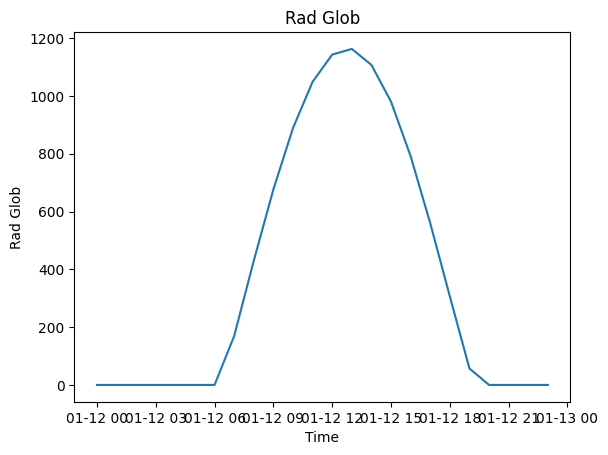

In [10]:
## Plot rad_glob

plt.plot(rad_day['date_local'], rad_day['rad_glob'])
plt.xlabel('Time')
plt.ylabel('Rad Glob')
plt.title('Rad Glob')
plt.show()

In [17]:
# Step 1: Identify solar noon by finding the midpoint between the first and last hours with rad_glob
radiation_hours = rad_day[rad_day['rad_glob'] > 0]['date_local'].dt.hour
first_hour, last_hour = radiation_hours.min(), radiation_hours.max()
solar_noon = first_hour + (last_hour - first_hour) // 2

# Define the dictionary for hourly adjustment factors relative to solar noon
hourly_factors = {
    0: 1.0,   # Solar noon
    1: 0.9,
    2: 0.7,
    3: 0.5,
    4: 0.3,
    5: 0.1,
    # Extend as needed
}

# Step 2: Apply the adjustment factor to rad_glob based on distance from solar noon
def apply_tracker_adjustment(row):
    hour_diff = abs(row['date_local'].hour - solar_noon)
    factor = hourly_factors.get(hour_diff, 0)  # Default to 0 if hour_diff not in dictionary
    return row['rad_glob'] * factor

rad_day['tracker_rad'] = rad_day.apply(apply_tracker_adjustment, axis=1)

C:\Users\gigle\AppData\Local\Temp\ipykernel_28244\3469990875.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rad_day['tracker_rad'] = rad_day.apply(apply_tracker_adjustment, axis=1)


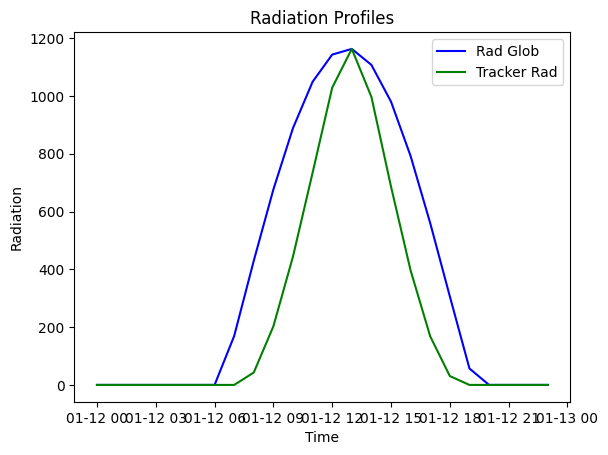

In [18]:
# Plot rad_glob, tracker_rad, and gx
plt.plot(rad_day['date_local'], rad_day['rad_glob'], label='Rad Glob', color='blue')
plt.plot(rad_day['date_local'], rad_day['tracker_rad'], label='Tracker Rad', color='green')
# plt.plot(rad_day['date_local'], rad_day['gx'], label='Gx', color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Radiation')
plt.title('Radiation Profiles')
plt.legend()  # Show legend to distinguish between lines

plt.show()